In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

In [200]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [201]:
df = pd.read_csv('Ready.csv')
df = df.drop(df.columns[0], axis=1)

<h1 style="font-size: 40px;">3. DATA VISUALIZATION & DATA PREPROCESSING </h1>

In [202]:
df

,Player,Market Value,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,PassBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,FRA,FW,Paris S-G,Ligue 1,24.0,29,24,2158,...,0.04,0.17,0.38,44.4,0.17,0.00,0.17,0.08,0.08,0.00
1,Erling Haaland,180.0,NOR,FW,Manchester City,Premier League,23.0,31,29,2552,...,0.11,0.07,0.11,66.7,0.39,0.04,0.35,0.07,0.56,0.00
2,Jude Bellingham,180.0,ENG,MF,Real Madrid,La Liga,20.0,28,27,2315,...,1.32,0.47,1.40,33.3,2.14,0.19,1.95,0.82,0.66,0.00
3,Phil Foden,150.0,ENG,"FW,MF",Manchester City,Premier League,23.0,35,33,2857,...,0.63,0.41,0.98,41.9,0.95,0.00,0.95,0.41,0.57,0.03
4,Bukayo Saka,140.0,ENG,FW,Arsenal,Premier League,21.0,35,35,2919,...,1.08,0.80,1.82,44.1,1.33,0.06,1.27,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,ESP,DF,Sevilla,La Liga,25.0,31,15,1753,...,1.33,1.18,1.74,67.6,1.33,0.31,1.03,0.77,2.77,0.00
823,Jorge Herrando,6.0,ESP,DF,Osasuna,La Liga,22.0,19,18,1644,...,1.04,0.66,1.04,63.2,1.09,0.60,0.49,0.82,3.77,0.05
824,Yerson Mosquera,6.0,COL,DF,Villarreal,La Liga,22.0,16,14,1229,...,0.95,0.88,1.09,80.0,0.88,0.15,0.73,1.24,4.74,0.00
825,Max Finkgräfe,6.0,GER,"DF,FW",Köln,Bundesliga,19.0,24,18,1756,...,2.00,2.00,3.79,52.7,1.79,0.51,1.28,1.13,2.00,0.00


<h2 style="font-size: 20px;">DATA OVERVIEW</h2>

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            827 non-null    object 
 1   Market Value      827 non-null    float64
 2   Nation            827 non-null    object 
 3   Pos               827 non-null    object 
 4   Squad             827 non-null    object 
 5   Comp              827 non-null    object 
 6   Age               827 non-null    float64
 7   MP                827 non-null    int64  
 8   Starts            827 non-null    int64  
 9   Min               827 non-null    int64  
 10  90s               827 non-null    float64
 11  Gls               827 non-null    int64  
 12  Ast               827 non-null    int64  
 13  G+A               827 non-null    int64  
 14  G-PK              827 non-null    int64  
 15  Gls/90            827 non-null    float64
 16  Ast/90            827 non-null    float64
 1

In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Market Value,827.0,25.313785,23.164438,6.00,10.000,18.00,30.000,180.00
Age,827.0,24.370012,3.391839,16.00,22.000,24.00,26.000,36.00
MP,827.0,27.223700,6.901908,9.00,22.000,29.00,33.000,38.00
Starts,827.0,21.665054,8.233592,4.00,15.000,22.00,28.500,38.00
Min,827.0,1908.997582,687.553550,616.00,1333.000,1953.00,2469.000,3420.00
...,...,...,...,...,...,...,...,...
ShBl90,827.0,0.328307,0.303171,0.00,0.080,0.24,0.495,1.50
PassBl90,827.0,0.828114,0.389229,0.07,0.550,0.76,1.050,2.34
Int90,827.0,0.808295,0.482853,0.00,0.425,0.77,1.130,2.79
Clr90,827.0,1.794268,1.389569,0.00,0.655,1.36,2.755,6.46


<h2 style="font-size: 20px;">HANDLING MISSING DATA</h2>

In [205]:
df.isnull().sum().sort_values(ascending=False)

G/SoT           38
Succ%            6
Dist             4
SoT%             4
npxG/Sh          4
                ..
G-xG             0
np:G-xG          0
Cmp90            0
Market Value     0
Err90            0
Length: 73, dtype: int64

In [206]:
df = df.drop("G/SoT", axis=1)

In [207]:
df = df.round(2)

In [208]:
#Replace the remaining missing values ​​with 0
df2 = df.copy()
df2 = df2.fillna(0)

<h2 style="font-size: 20px;">CONVERT TEXT DATA INTO CATEGORICAL</h2>

<h3 style="font-size: 14px;">SQUAD/CLUB</h3>

Categorize and assign ranking values ​​to clubs in the dataframe, information are collected from FORBES. In particular, the 10 most valuable clubs in the world are assigned a value of 1, the next 15 clubs are assigned a value of 2, and the remaining clubs are assigned a value of 3.

In [209]:
print(df["Squad"].unique())

['Paris S-G' 'Manchester City' 'Real Madrid' 'Arsenal' 'Leverkusen'
 'Bayern Munich' 'Betis' 'Inter' 'Napoli' 'Milan' 'Barcelona'
 'Newcastle Utd' 'Chelsea' 'RB Leipzig' 'Liverpool' 'Aston Villa'
 'Manchester Utd' 'Tottenham' 'West Ham' 'Juventus' 'Athletic Club'
 'Fulham' 'Crystal Palace' 'Wolves' 'Bologna' 'Lille' 'Brentford'
 'Real Sociedad' 'Brighton' 'Marseille' 'Atalanta' 'Everton' 'Girona'
 "Nott'ham Forest" 'Dortmund' 'Bournemouth' 'Stuttgart' 'Torino' 'Nice'
 'Eint Frankfurt' 'Fiorentina' 'Lens' 'Monaco' 'Atlético Madrid'
 'Hoffenheim' 'Roma' 'Valencia' 'Rennes' 'Getafe' 'Villarreal'
 'Celta Vigo' 'Lyon' 'Genoa' 'Lazio' 'Gladbach' 'Wolfsburg' 'Sevilla'
 'Burnley' 'Hellas Verona' 'Mainz 05' 'Freiburg' 'Toulouse' 'Monza'
 'Strasbourg' 'Union Berlin' 'Metz' 'Luton Town' 'Lorient' 'Heidenheim'
 'Sassuolo' 'Sheffield Utd' 'Osasuna' 'Empoli' 'Las Palmas' 'Udinese'
 'Brest' 'Reims' 'Mallorca' 'Nantes' 'Lecce' 'Granada' 'Werder Bremen'
 'Le Havre' 'Almería' 'Montpellier' 'Salernitana'

In [210]:
print(df["Squad"].value_counts())

Squad
Liverpool        18
Paris S-G        17
Monaco           17
Aston Villa      17
Newcastle Utd    17
                 ..
Metz              2
Empoli            1
Augsburg          1
Mallorca          1
Heidenheim        1
Name: count, Length: 92, dtype: int64


In [211]:
club_ranking = {
    "Manchester City": 1,
    "Real Madrid": 1,
    "Arsenal": 1,
    "Chelsea": 1,
    "Paris S-G": 1,
    "Bayern Munich": 1,
    "Liverpool": 1,
    "Barcelona": 1,
    "Tottenham": 1,
    "Manchester United": 1,
    "Inter": 2,
    "Newcastle United": 2,
    "Leverkusen": 2,
    "Aston Villa": 2,
    "Brighton": 2,
    "Milan": 2,
    "Juventus": 2,
    "Crystal Palace": 2,
    "West Ham": 2,
    "Real Sociedad": 2,
    "Atalanta" : 2,
    "Napoli" : 2,
    "RB Leipzig" : 2,
    "Atlético Madrid" : 2,
    "Brentford" : 2,
    
}

df2['Squad'] = df2['Squad'].map(club_ranking).fillna(3)

In [212]:
df2

,Player,Market Value,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,PassBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,FRA,FW,1.0,Ligue 1,24.0,29,24,2158,...,0.04,0.17,0.38,44.4,0.17,0.00,0.17,0.08,0.08,0.00
1,Erling Haaland,180.0,NOR,FW,1.0,Premier League,23.0,31,29,2552,...,0.11,0.07,0.11,66.7,0.39,0.04,0.35,0.07,0.56,0.00
2,Jude Bellingham,180.0,ENG,MF,1.0,La Liga,20.0,28,27,2315,...,1.32,0.47,1.40,33.3,2.14,0.19,1.95,0.82,0.66,0.00
3,Phil Foden,150.0,ENG,"FW,MF",1.0,Premier League,23.0,35,33,2857,...,0.63,0.41,0.98,41.9,0.95,0.00,0.95,0.41,0.57,0.03
4,Bukayo Saka,140.0,ENG,FW,1.0,Premier League,21.0,35,35,2919,...,1.08,0.80,1.82,44.1,1.33,0.06,1.27,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,ESP,DF,3.0,La Liga,25.0,31,15,1753,...,1.33,1.18,1.74,67.6,1.33,0.31,1.03,0.77,2.77,0.00
823,Jorge Herrando,6.0,ESP,DF,3.0,La Liga,22.0,19,18,1644,...,1.04,0.66,1.04,63.2,1.09,0.60,0.49,0.82,3.77,0.05
824,Yerson Mosquera,6.0,COL,DF,3.0,La Liga,22.0,16,14,1229,...,0.95,0.88,1.09,80.0,0.88,0.15,0.73,1.24,4.74,0.00
825,Max Finkgräfe,6.0,GER,"DF,FW",3.0,Bundesliga,19.0,24,18,1756,...,2.00,2.00,3.79,52.7,1.79,0.51,1.28,1.13,2.00,0.00


<h3 style="font-size: 14px;">LEAGUE</h3>

[Text(0.5, 0, 'Top 5 Leauges in Europe '),
 Text(0, 0.5, 'Market Value'),
 Text(0.5, 1.0, 'Leauge vs MV')]

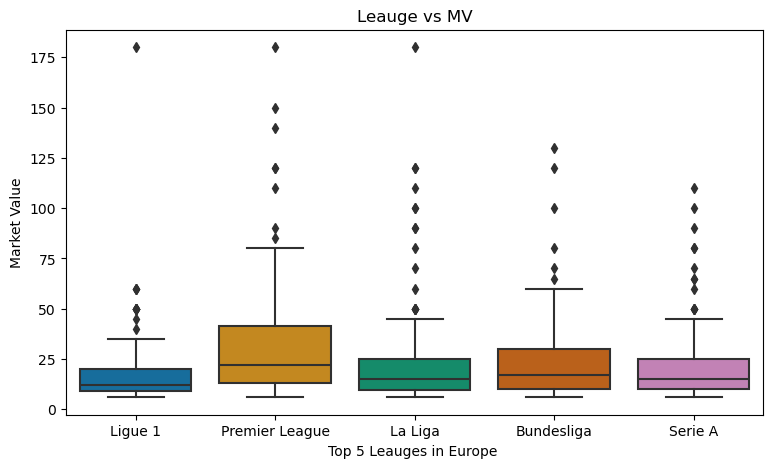

In [213]:
plt.figure(figsize=(9,5))
ax=sns.boxplot(y='Market Value', x='Comp',data=df,palette="colorblind")
ax.set(xlabel='Top 5 Leauges in Europe ', ylabel='Market Value',title='Leauge vs MV')

In [214]:
league_ranking = {
    "Premier League": 1,
    "Bundesliga": 2,
    "Serie A": 3,
    "La Liga": 3,
    "Ligue 1": 4
}
df2['Comp'] = df2['Comp'].map(league_ranking)

In [215]:
df2

,Player,Market Value,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,PassBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,FRA,FW,1.0,4,24.0,29,24,2158,...,0.04,0.17,0.38,44.4,0.17,0.00,0.17,0.08,0.08,0.00
1,Erling Haaland,180.0,NOR,FW,1.0,1,23.0,31,29,2552,...,0.11,0.07,0.11,66.7,0.39,0.04,0.35,0.07,0.56,0.00
2,Jude Bellingham,180.0,ENG,MF,1.0,3,20.0,28,27,2315,...,1.32,0.47,1.40,33.3,2.14,0.19,1.95,0.82,0.66,0.00
3,Phil Foden,150.0,ENG,"FW,MF",1.0,1,23.0,35,33,2857,...,0.63,0.41,0.98,41.9,0.95,0.00,0.95,0.41,0.57,0.03
4,Bukayo Saka,140.0,ENG,FW,1.0,1,21.0,35,35,2919,...,1.08,0.80,1.82,44.1,1.33,0.06,1.27,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,ESP,DF,3.0,3,25.0,31,15,1753,...,1.33,1.18,1.74,67.6,1.33,0.31,1.03,0.77,2.77,0.00
823,Jorge Herrando,6.0,ESP,DF,3.0,3,22.0,19,18,1644,...,1.04,0.66,1.04,63.2,1.09,0.60,0.49,0.82,3.77,0.05
824,Yerson Mosquera,6.0,COL,DF,3.0,3,22.0,16,14,1229,...,0.95,0.88,1.09,80.0,0.88,0.15,0.73,1.24,4.74,0.00
825,Max Finkgräfe,6.0,GER,"DF,FW",3.0,2,19.0,24,18,1756,...,2.00,2.00,3.79,52.7,1.79,0.51,1.28,1.13,2.00,0.00


<h3 style="font-size: 14px;">NATION & POSITION</h3>

In [216]:
print(df["Nation"].unique())

['FRA' 'NOR' 'ENG' 'GER' 'URU' 'ESP' 'ARG' 'BRA' 'NGA' 'POR' 'GEO' 'ITA'
 'NED' 'ECU' 'HUN' 'SWE' 'COL' 'DEN' 'SRB' 'MAR' 'BEL' 'EGY' 'GHA' 'CAN'
 'JPN' 'IRL' 'WAL' 'SEN' 'BFA' 'TUR' 'SUI' 'JAM' 'CMR' 'USA' 'GUI' 'UKR'
 'ALG' 'MLI' 'MEX' 'SCO' 'CIV' 'RUS' 'AUT' 'POL' 'COD' 'SVK' 'KVX' 'ROU'
 'VEN' 'CZE' 'PAR' 'GNB' 'CRO' 'GRE' 'ALB' 'NIR' 'BDI' 'RSA' 'CPV' 'CTA'
 'TUN' 'TOG' 'ZIM' 'GAB' 'SVN' 'SUR' 'CHI' 'MOZ' 'ISL' 'KEN' 'EQG' 'ANG']


In [217]:
print(df["Pos"].unique())

['FW' 'MF' 'FW,MF' 'MF,FW' 'MF,DF' 'DF' 'DF,MF' 'FW,DF' 'DF,FW']


In [218]:
label_encoder = LabelEncoder()
categorical_columns = ['Nation', 'Pos']
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

In [219]:
df2

,Player,Market Value,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,PassBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,25,3,1.0,4,24.0,29,24,2158,...,0.04,0.17,0.38,44.4,0.17,0.00,0.17,0.08,0.08,0.00
1,Erling Haaland,180.0,48,3,1.0,1,23.0,31,29,2552,...,0.11,0.07,0.11,66.7,0.39,0.04,0.35,0.07,0.56,0.00
2,Jude Bellingham,180.0,22,6,1.0,3,20.0,28,27,2315,...,1.32,0.47,1.40,33.3,2.14,0.19,1.95,0.82,0.66,0.00
3,Phil Foden,150.0,22,5,1.0,1,23.0,35,33,2857,...,0.63,0.41,0.98,41.9,0.95,0.00,0.95,0.41,0.57,0.03
4,Bukayo Saka,140.0,22,3,1.0,1,21.0,35,35,2919,...,1.08,0.80,1.82,44.1,1.33,0.06,1.27,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,24,0,3.0,3,25.0,31,15,1753,...,1.33,1.18,1.74,67.6,1.33,0.31,1.03,0.77,2.77,0.00
823,Jorge Herrando,6.0,24,0,3.0,3,22.0,19,18,1644,...,1.04,0.66,1.04,63.2,1.09,0.60,0.49,0.82,3.77,0.05
824,Yerson Mosquera,6.0,14,0,3.0,3,22.0,16,14,1229,...,0.95,0.88,1.09,80.0,0.88,0.15,0.73,1.24,4.74,0.00
825,Max Finkgräfe,6.0,28,1,3.0,2,19.0,24,18,1756,...,2.00,2.00,3.79,52.7,1.79,0.51,1.28,1.13,2.00,0.00


In [220]:
df3 = df2.copy()

<h2 style="font-size: 20px;">VISUALIZATION</h2>

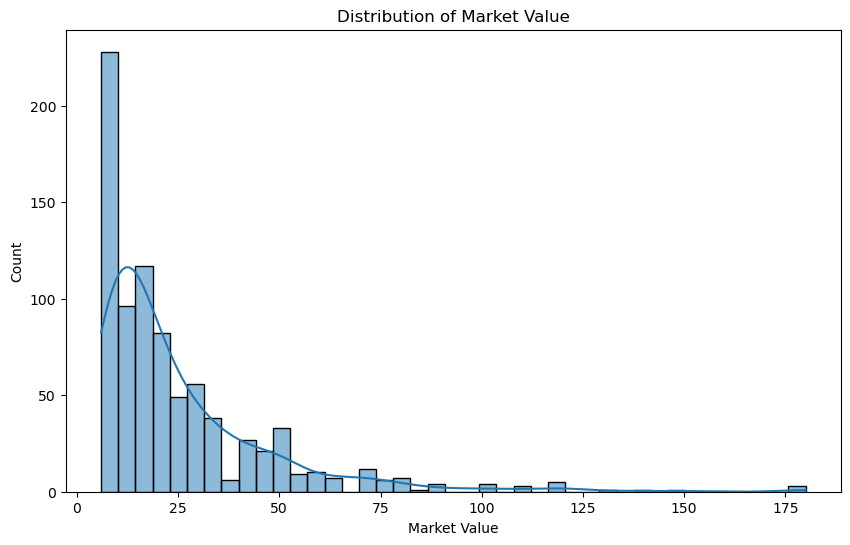

In [221]:
plt.figure(figsize=(10, 6))
warnings.filterwarnings("ignore", category=FutureWarning)
sns.histplot(df['Market Value'], kde=True)
plt.title('Distribution of Market Value')
plt.show()

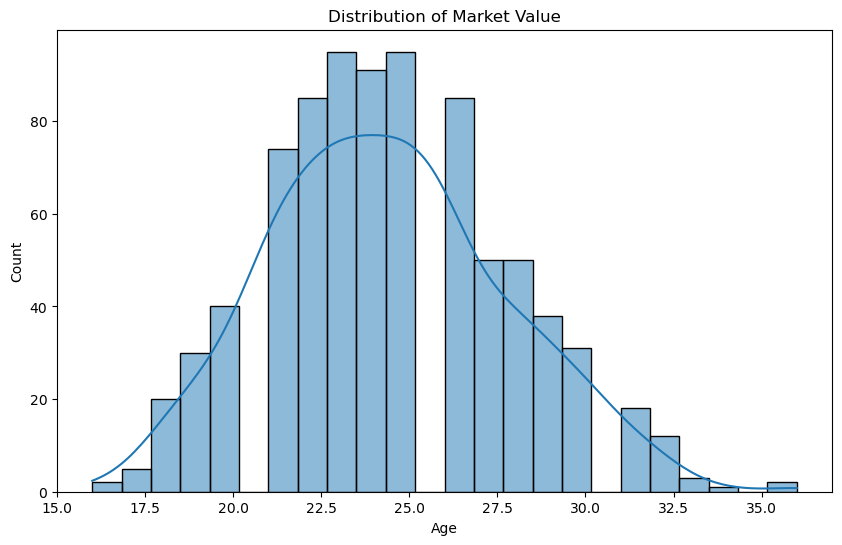

In [222]:
plt.figure(figsize=(10, 6))
warnings.filterwarnings("ignore", category=FutureWarning)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Market Value')
plt.show()

In [223]:
df3

,Player,Market Value,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,...,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,PassBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,25,3,1.0,4,24.0,29,24,2158,...,0.04,0.17,0.38,44.4,0.17,0.00,0.17,0.08,0.08,0.00
1,Erling Haaland,180.0,48,3,1.0,1,23.0,31,29,2552,...,0.11,0.07,0.11,66.7,0.39,0.04,0.35,0.07,0.56,0.00
2,Jude Bellingham,180.0,22,6,1.0,3,20.0,28,27,2315,...,1.32,0.47,1.40,33.3,2.14,0.19,1.95,0.82,0.66,0.00
3,Phil Foden,150.0,22,5,1.0,1,23.0,35,33,2857,...,0.63,0.41,0.98,41.9,0.95,0.00,0.95,0.41,0.57,0.03
4,Bukayo Saka,140.0,22,3,1.0,1,21.0,35,35,2919,...,1.08,0.80,1.82,44.1,1.33,0.06,1.27,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,24,0,3.0,3,25.0,31,15,1753,...,1.33,1.18,1.74,67.6,1.33,0.31,1.03,0.77,2.77,0.00
823,Jorge Herrando,6.0,24,0,3.0,3,22.0,19,18,1644,...,1.04,0.66,1.04,63.2,1.09,0.60,0.49,0.82,3.77,0.05
824,Yerson Mosquera,6.0,14,0,3.0,3,22.0,16,14,1229,...,0.95,0.88,1.09,80.0,0.88,0.15,0.73,1.24,4.74,0.00
825,Max Finkgräfe,6.0,28,1,3.0,2,19.0,24,18,1756,...,2.00,2.00,3.79,52.7,1.79,0.51,1.28,1.13,2.00,0.00


<h2 style="font-size: 20px;">CORRELATION MATRIX</h2>

In [224]:
df4 = df3.drop(columns=['Player','Market Value'])

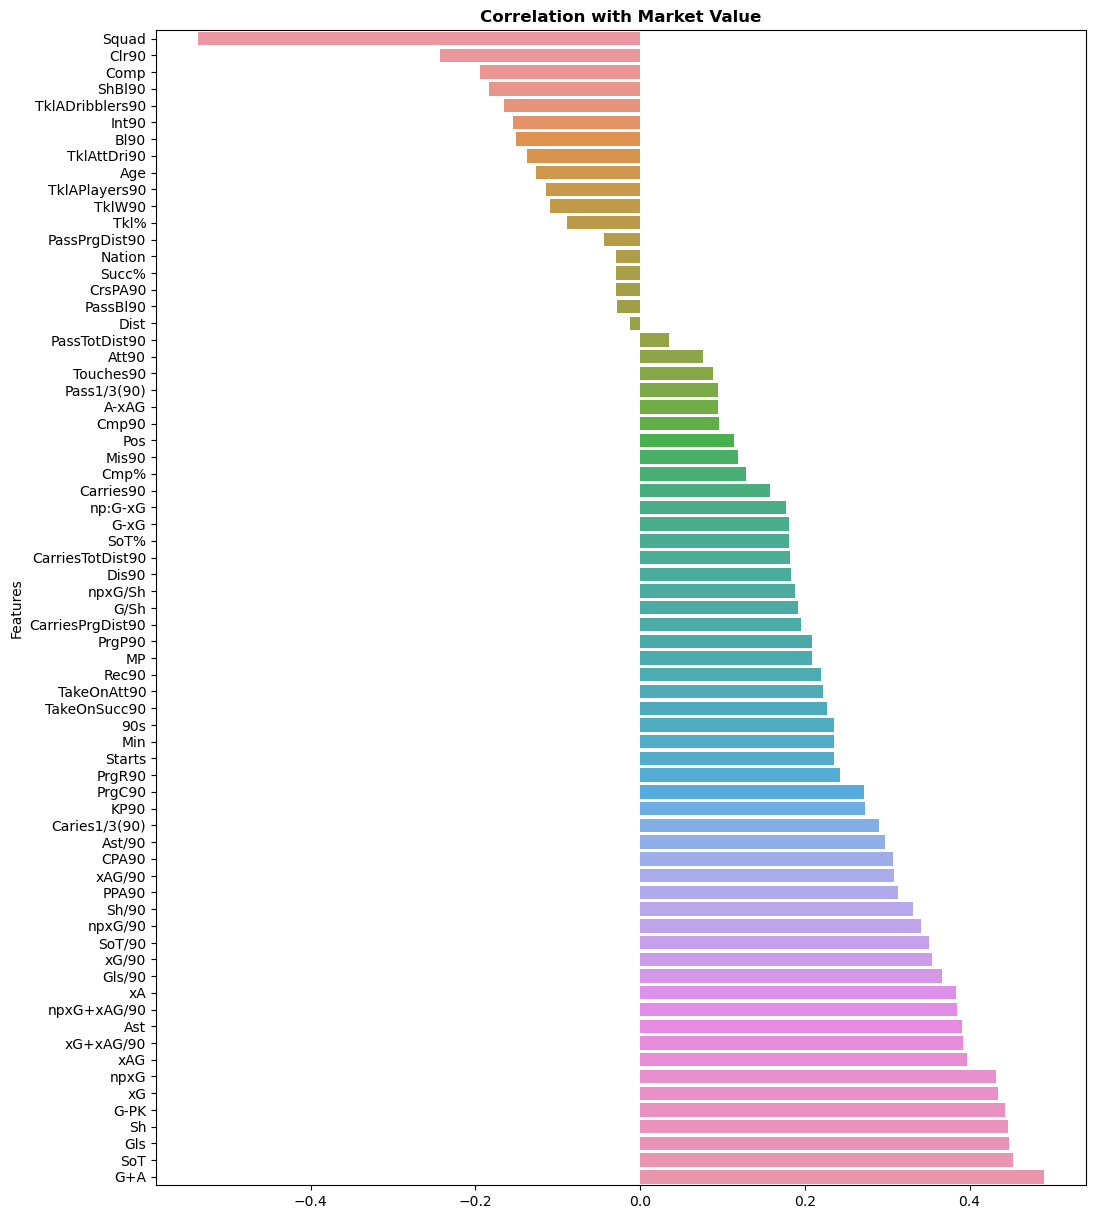

In [225]:
cor = df4.iloc[:,:-1].corrwith(df['Market Value']).sort_values()
plt.figure(figsize=(12, 15))
ax = sns.barplot(x=cor.values, y=cor.index)
plt.title('Correlation with Market Value', fontsize=12, weight='semibold')
ax.set_ylabel('Features')
plt.show()

In [226]:
low_corr_features = cor.index[abs(cor) < 0.05]

In [227]:
print(low_corr_features)

Index(['PassPrgDist90', 'Nation', 'Succ%', 'CrsPA90', 'PassBl90', 'Dist',
       'PassTotDist90'],
      dtype='object')


For linear models such as linear regression, retaining features with low correlation values ​​with the target may not be necessary.

In [228]:
df3 = df3.drop(low_corr_features, axis=1)

In [229]:
df3

,Player,Market Value,Pos,Squad,Comp,Age,MP,Starts,Min,90s,...,TklAPlayers90,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,Int90,Clr90,Err90
0,Kylian Mbappé,180.0,3,1.0,4,24.0,29,24,2158,24.0,...,0.17,0.04,0.17,0.38,44.4,0.17,0.00,0.08,0.08,0.00
1,Erling Haaland,180.0,3,1.0,1,23.0,31,29,2552,28.4,...,0.21,0.11,0.07,0.11,66.7,0.39,0.04,0.07,0.56,0.00
2,Jude Bellingham,180.0,6,1.0,3,20.0,28,27,2315,25.7,...,1.63,1.32,0.47,1.40,33.3,2.14,0.19,0.82,0.66,0.00
3,Phil Foden,150.0,5,1.0,1,23.0,35,33,2857,31.7,...,0.98,0.63,0.41,0.98,41.9,0.95,0.00,0.41,0.57,0.03
4,Bukayo Saka,140.0,3,1.0,1,21.0,35,35,2919,32.4,...,2.04,1.08,0.80,1.82,44.1,1.33,0.06,0.46,0.74,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,0,3.0,3,25.0,31,15,1753,19.5,...,2.36,1.33,1.18,1.74,67.6,1.33,0.31,0.77,2.77,0.00
823,Jorge Herrando,6.0,0,3.0,3,22.0,19,18,1644,18.3,...,1.58,1.04,0.66,1.04,63.2,1.09,0.60,0.82,3.77,0.05
824,Yerson Mosquera,6.0,0,3.0,3,22.0,16,14,1229,13.7,...,1.97,0.95,0.88,1.09,80.0,0.88,0.15,1.24,4.74,0.00
825,Max Finkgräfe,6.0,1,3.0,2,19.0,24,18,1756,19.5,...,3.33,2.00,2.00,3.79,52.7,1.79,0.51,1.13,2.00,0.00


In [230]:
high_corr_features = cor.index[abs(cor) > 0.4]

In [231]:
print(high_corr_features)

Index(['Squad', 'npxG', 'xG', 'G-PK', 'Sh', 'Gls', 'SoT', 'G+A'], dtype='object')


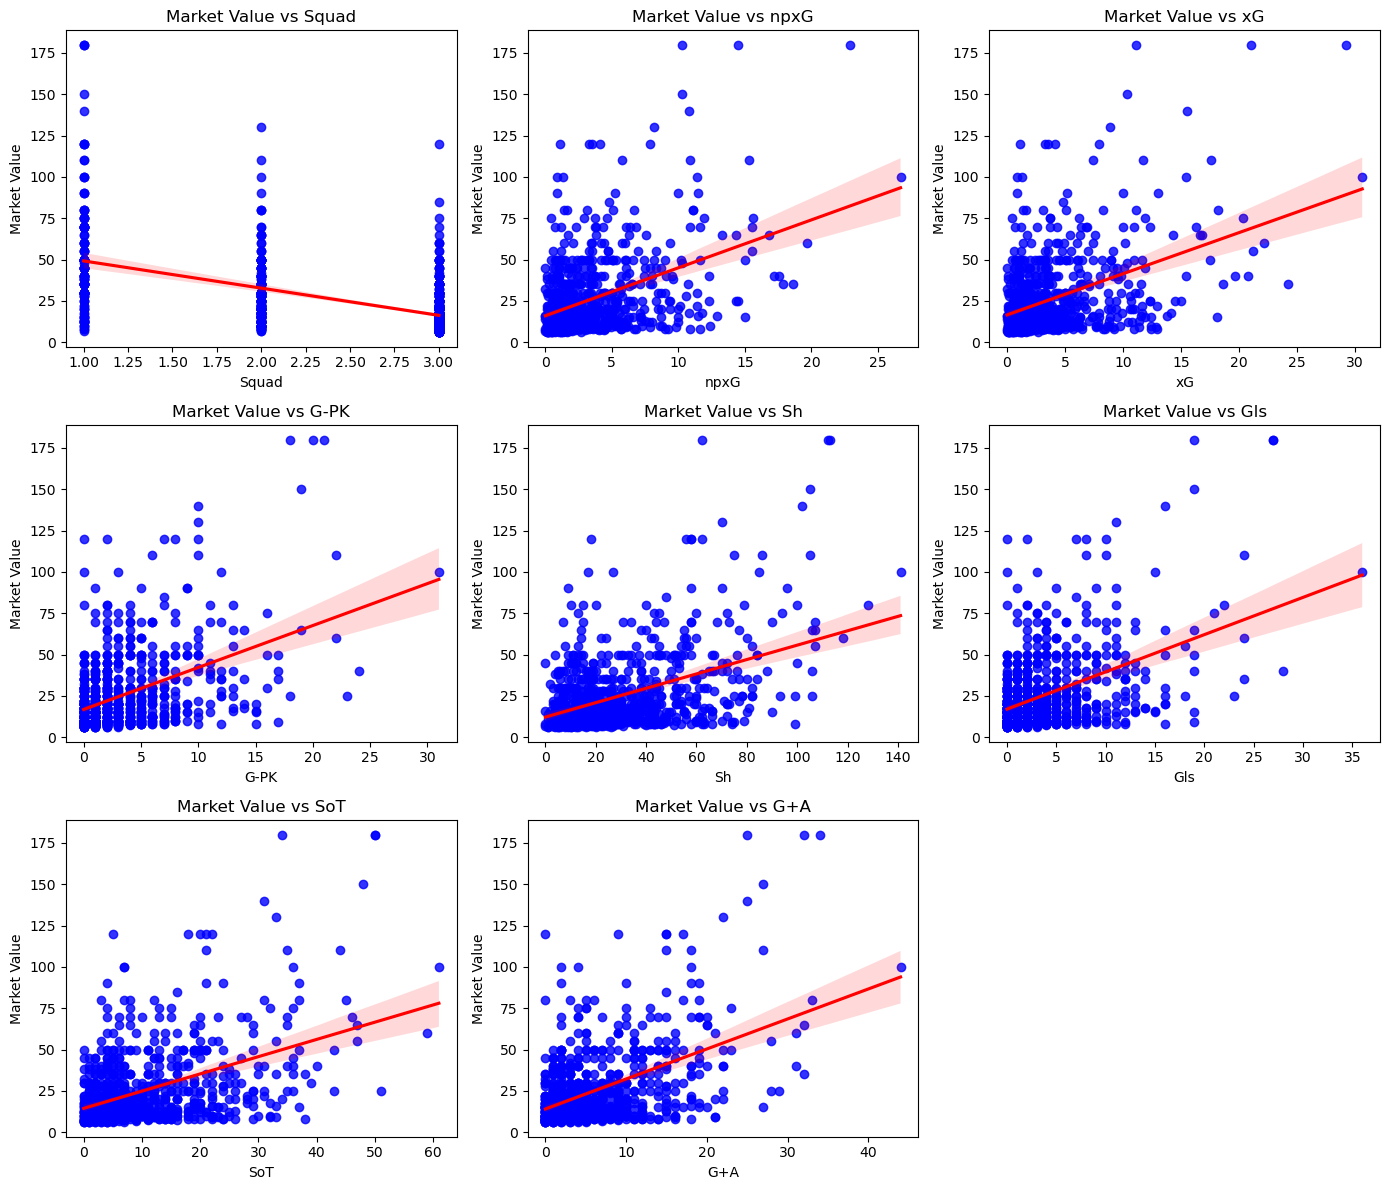

In [232]:
plt.figure(figsize=(14, 12))
for i, feature in enumerate(high_corr_features):
    if feature != 'Market Value' and feature in df3.columns:
        plt.subplot(3, 3, i+1)
        sns.regplot(x=df3[feature], y=df3['Market Value'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
        plt.title(f'Market Value vs {feature}')
plt.tight_layout()
plt.show()

<h2 style="font-size: 20px;">REMOVE OUTLIERS</h2>

In [233]:
Q1 = df3['Market Value'].quantile(0.25)
Q3 = df3['Market Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu để loại bỏ các điểm ngoại lai
df3 = df3[(df3['Market Value'] >= lower_bound) & (df3['Market Value'] <= upper_bound)]

In [234]:
df3

,Player,Market Value,Pos,Squad,Comp,Age,MP,Starts,Min,90s,...,TklAPlayers90,TklW90,TklADribblers90,TklAttDri90,Tkl%,Bl90,ShBl90,Int90,Clr90,Err90
55,Cristian Romero,60.0,0,1.0,1,25.0,33,33,2790,31.0,...,2.13,1.29,1.03,1.42,72.7,1.48,0.71,1.42,3.42,0.03
56,Anthony Gordon,60.0,3,3.0,1,22.0,35,34,2890,32.1,...,1.71,1.06,0.69,1.99,34.4,0.84,0.00,0.22,0.22,0.00
57,Theo Hernández,60.0,0,2.0,3,25.0,32,31,2791,31.0,...,0.97,0.55,0.35,0.71,50.0,1.06,0.42,0.74,1.35,0.03
58,Achraf Hakimi,60.0,0,1.0,4,24.0,25,20,1932,21.5,...,1.35,0.88,0.79,1.58,50.0,1.30,0.19,0.56,1.30,0.09
59,Ousmane Dembélé,60.0,8,1.0,4,26.0,26,17,1506,16.7,...,1.14,0.84,0.36,0.78,46.2,0.66,0.00,0.30,0.24,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Adrià Pedrosa,6.0,0,3.0,3,25.0,31,15,1753,19.5,...,2.36,1.33,1.18,1.74,67.6,1.33,0.31,0.77,2.77,0.00
823,Jorge Herrando,6.0,0,3.0,3,22.0,19,18,1644,18.3,...,1.58,1.04,0.66,1.04,63.2,1.09,0.60,0.82,3.77,0.05
824,Yerson Mosquera,6.0,0,3.0,3,22.0,16,14,1229,13.7,...,1.97,0.95,0.88,1.09,80.0,0.88,0.15,1.24,4.74,0.00
825,Max Finkgräfe,6.0,1,3.0,2,19.0,24,18,1756,19.5,...,3.33,2.00,2.00,3.79,52.7,1.79,0.51,1.13,2.00,0.00


In [235]:
df3.to_csv('Processing.csv')

<h1 style="font-size: 40px;"> MODELLING </h1>

In [236]:
df3 = pd.read_csv('Processing.csv')

In [237]:
df3 = df3.drop(["Unnamed: 0"], axis=1)

In [238]:
y = df3['Market Value']

In [239]:
X = df3.drop(["Market Value","Player"], axis=1)

In [248]:
#Spliting training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [249]:
#Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training

#### Linear Regression is the only model that I use for training.

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMean Squared Error: {sqrt(mse)}')
print(f'R^2 Score: {r2}')

RMean Squared Error: 9.665759523056993
R^2 Score: 0.5111633553600108


## Hyperparameter Tuning and Regularization

Hyperparameter Tuning is often not effective for Linear Regression because few hyperparameters to tune compared to more complex models such as Decision trees, Random forests, ... The main hyperparameters are often related to regularization techniques such as Ridge or Lasso.

#### Hyperparameter Tuning using Lasso Regression (L1 Regularization)

In [265]:
lasso = Lasso(max_iter=10000)
params = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 60, 100, 200, 500, 1000]}
lasso_reg = GridSearchCV(lasso, params, cv=5)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print("Lasso Regression (L1) - Best Alpha:", lasso_reg.best_params_)
print("Lasso Regression (L1) - RMSE:", sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso Regression (L1) - R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression (L1) - Best Alpha: {'alpha': 0.1}
Lasso Regression (L1) - RMSE: 9.330266836823297
Lasso Regression (L1) - R2 Score: 0.544508883699877


#### Hyperparameter Tuning using Ridge Regression (L2 Regularization)

In [264]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 60, 100, 200, 500, 1000]}
ridge_reg = GridSearchCV(ridge, params, cv=5)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
print("Ridge Regression (L2) - Best Alpha:", ridge_reg.best_params_)
print("Ridge Regression (L2) - RMSE:", sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge Regression (L2) - R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression (L2) - Best Alpha: {'alpha': 30}
Ridge Regression (L2) - RMSE: 9.341383588060799
Ridge Regression (L2) - R2 Score: 0.543422827303627


## Optimization

#### Using gradient descent for Optimization

In [263]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # Insert bias term (column of ones) to the input features for the intercept
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        # Initialize weights (theta) to zeros
        self.theta = np.zeros(self.n)

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Prediction
            predictions = X.dot(self.theta)
            # Compute the gradients
            gradients = 2 / self.m * X.T.dot(predictions - y)
            # Update the weights
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        # Insert bias term (column of ones) to the input features for the intercept
        X = np.insert(X, 0, 1, axis=1)
        # Prediction
        return X.dot(self.theta)

# Initialize the Gradient Descent Linear Regression model
gd_reg = GradientDescentLinearRegression(learning_rate=0.01, n_iterations=1000)

# Fit the model
gd_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_gd = gd_reg.predict(X_test)
print("Gradient Descent Linear Regression - RMSE:", sqrt(mean_squared_error(y_test, y_pred_gd)))
print("Gradient Descent Linear Regression - R2 Score:", r2_score(y_test, y_pred_gd))

Gradient Descent Linear Regression - RMSE: 9.323426069379675
Gradient Descent Linear Regression - R2 Score: 0.5451765530371662
